# **Import Module**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings('ignore')

# **Download Data**

In [5]:
!wget --no-check-certificate https://raw.githubusercontent.com/rioooranteai/data-analytics---modeling/main/Apple%20Stock/Dataset/apple_stock_data.csv -O /content/apple_stock_data.csv

--2025-02-27 13:05:03--  https://raw.githubusercontent.com/rioooranteai/data-analytics---modeling/main/Apple%20Stock/Dataset/apple_stock_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31516 (31K) [text/plain]
Saving to: ‘/content/apple_stock_data.csv’

/content/apple_stoc 100%[===================>]  30.78K  --.-KB/s    in 0.004s  

2025-02-27 13:05:03 (8.26 MB/s) - ‘/content/apple_stock_data.csv’ saved [31516/31516]



# **Read Data**

In [7]:
df = pd.read_csv('/content/apple_stock_data.csv')
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300


In [8]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,199.088202,199.454286,201.093056,197.608373,199.316032,5.832214e+07
std,21.511933,21.321567,21.571427,20.963034,21.365476,3.025771e+07
min,164.585999,165.000000,166.399994,164.080002,165.350006,2.404830e+07
25%,182.254063,182.852501,184.617504,181.487499,182.777504,4.278855e+07
50%,192.370026,193.084999,194.399994,191.724998,192.989998,5.174865e+07
75%,221.697502,221.697502,224.149994,219.717499,221.635002,6.497460e+07
max,236.479996,236.479996,237.490005,234.449997,236.479996,3.186799e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Adj Close  252 non-null    float64
 2   Close      252 non-null    float64
 3   High       252 non-null    float64
 4   Low        252 non-null    float64
 5   Open       252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


# **Exploratory Data Analysis**

In [26]:
data = df.copy(deep=True)

In [27]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

In [28]:
data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300


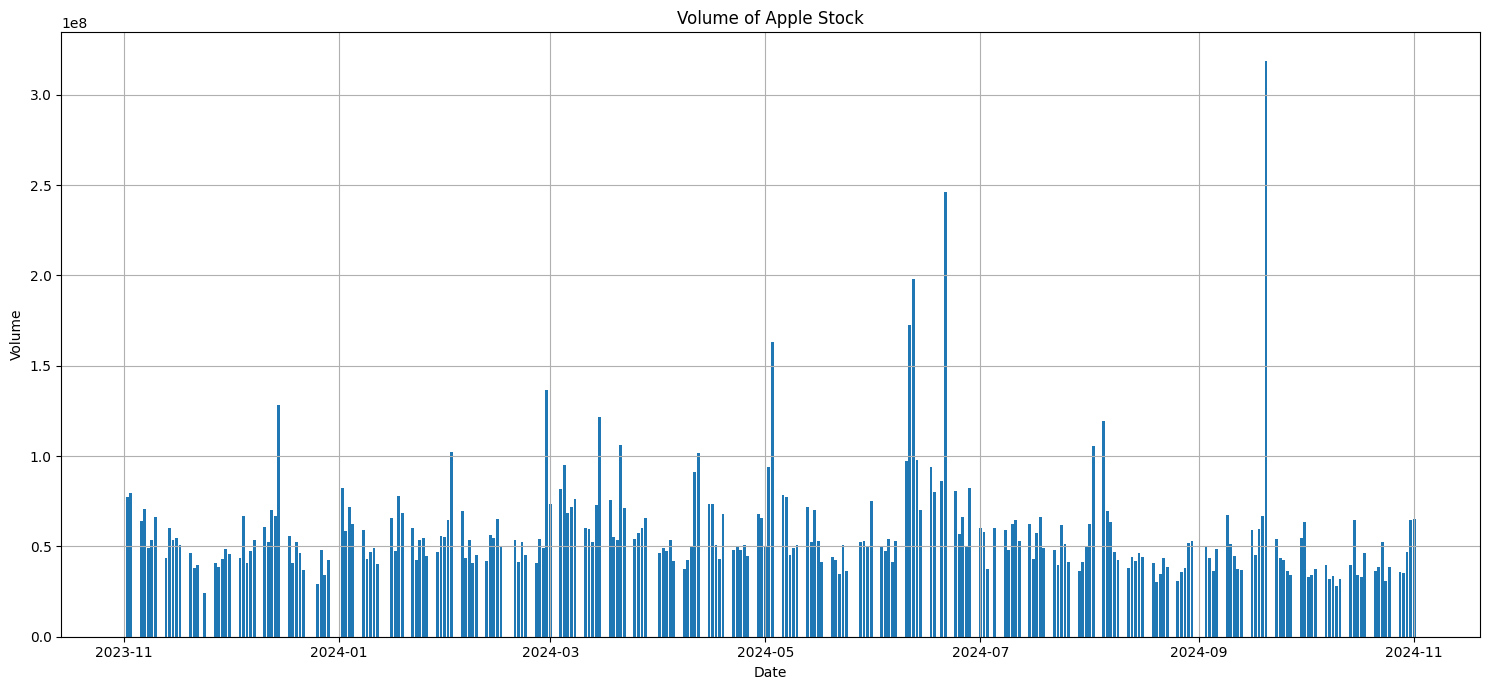

In [37]:
plt.figure(figsize=(15, 7))
plt.bar(data.index, data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Apple Stock')
plt.grid(True)
plt.tight_layout()
plt.show()

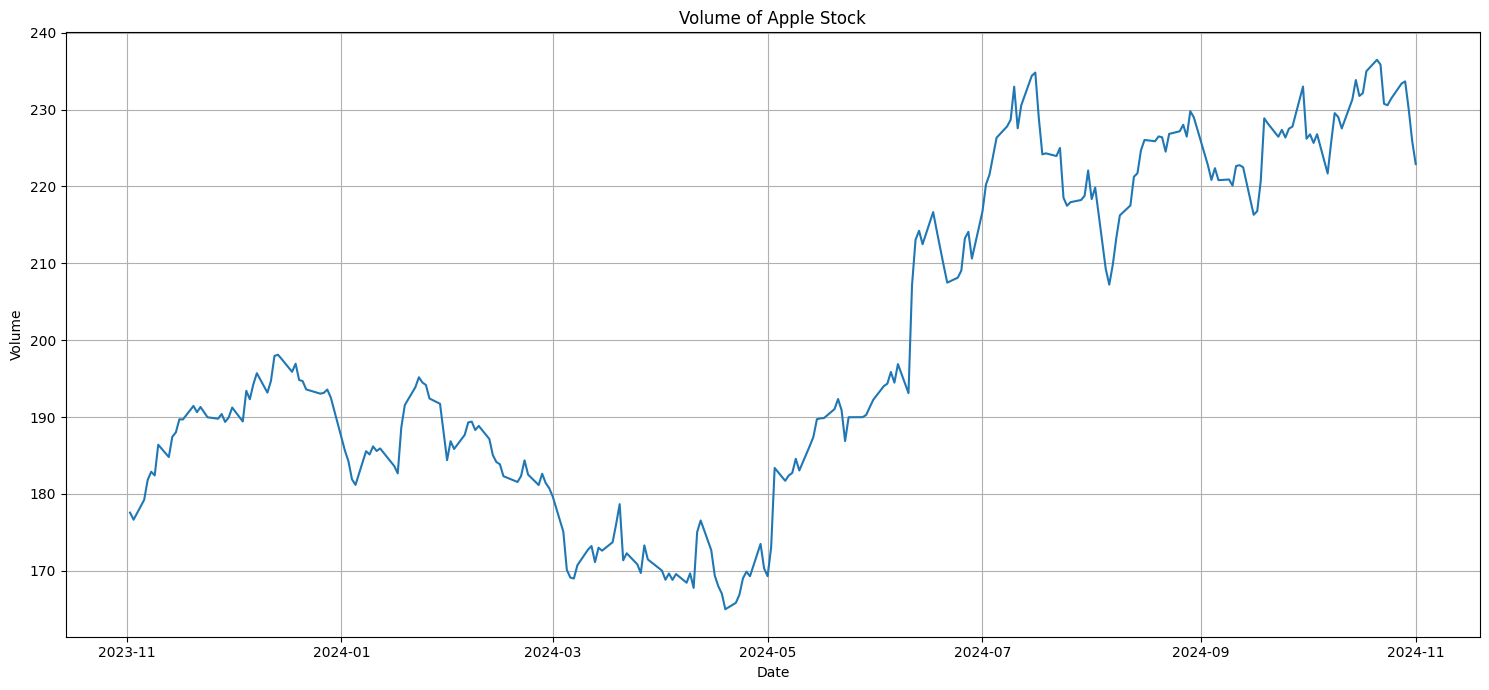

In [38]:
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Apple Stock')
plt.grid(True)
plt.tight_layout()
plt.show()

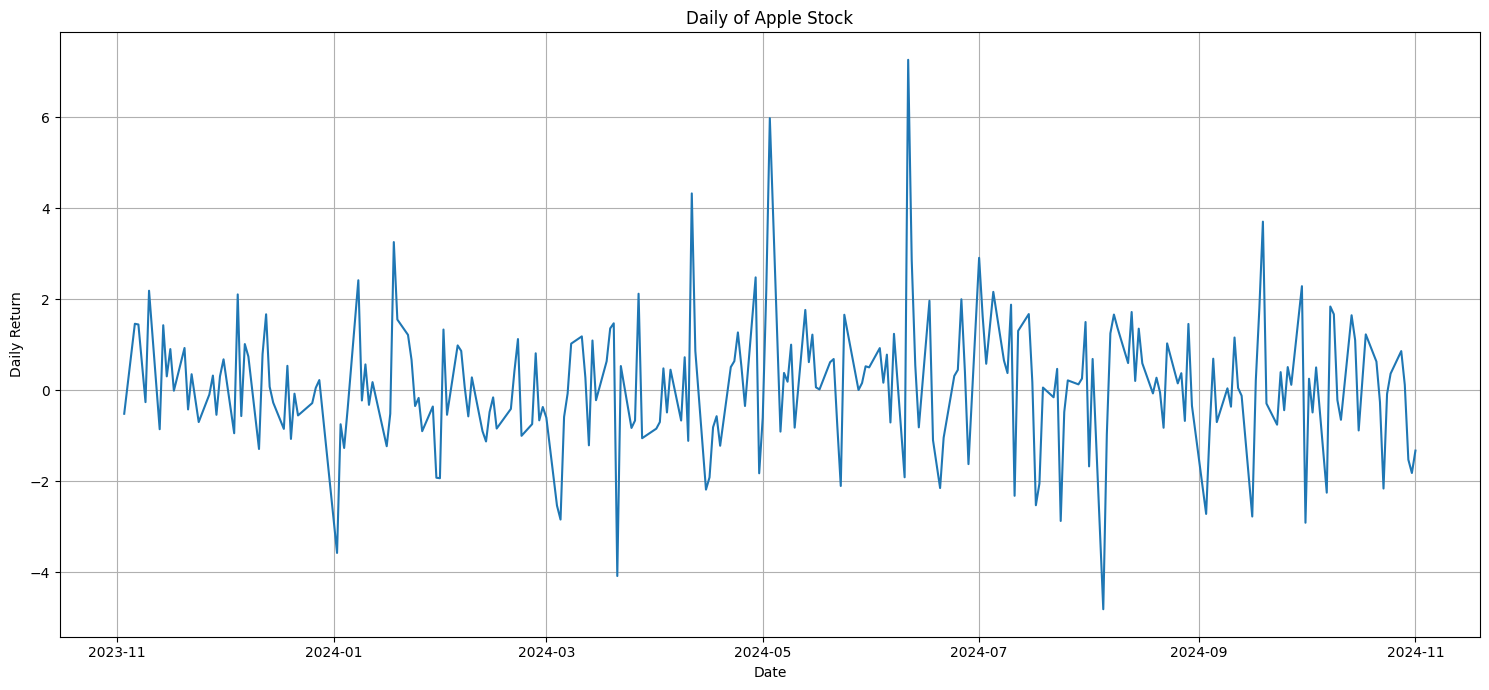

In [42]:
data['Daily_Return'] = data['Close'].pct_change() * 100

plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Daily_Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily of Apple Stock')
plt.grid(True)
plt.tight_layout()
plt.show()

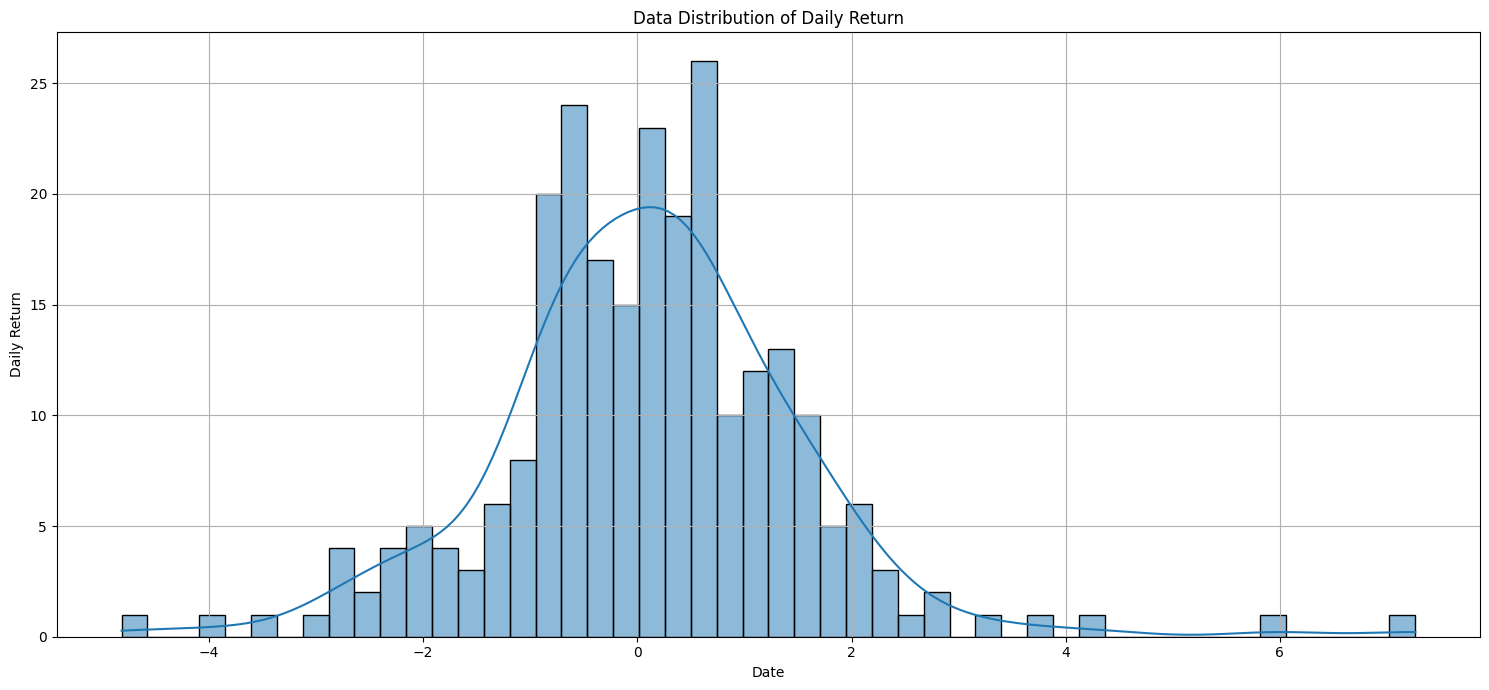

In [44]:
plt.figure(figsize=(15, 7))
sns.histplot(data['Daily_Return'].dropna(), kde=True, bins=50)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Data Distribution of Daily Return')
plt.grid(True)
plt.tight_layout()

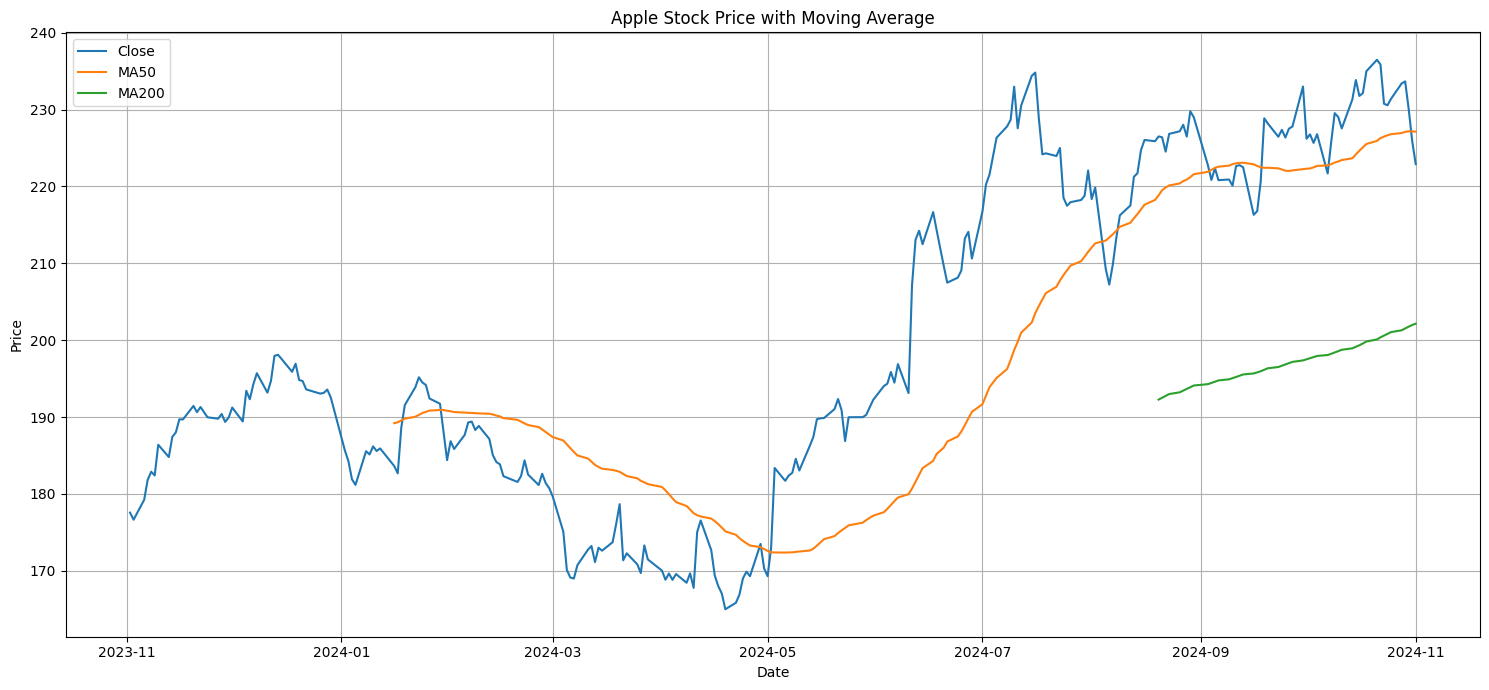

In [45]:
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA50'], label='MA50')
plt.plot(data.index, data['MA200'], label='MA200')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price with Moving Average')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

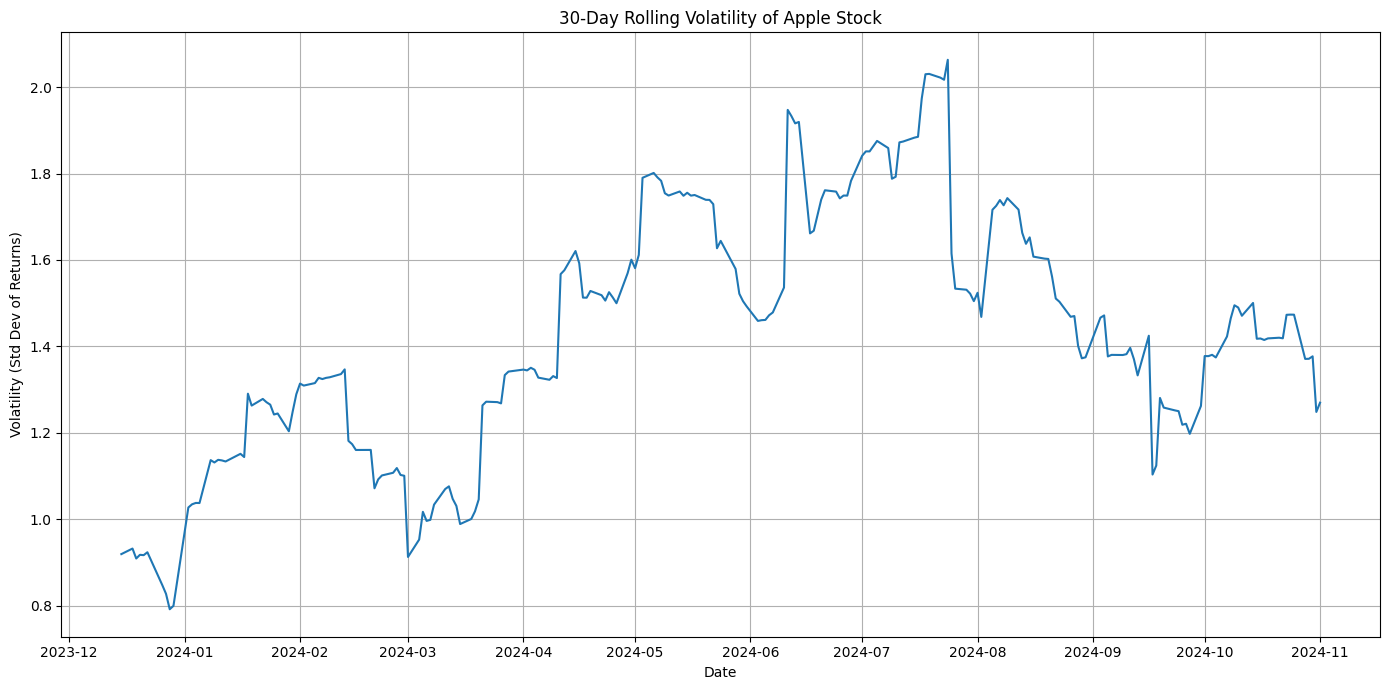

In [47]:
data['Volatility_30d'] = data['Daily_Return'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(data['Volatility_30d'])
plt.title('30-Day Rolling Volatility of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev of Returns)')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1500x700 with 0 Axes>

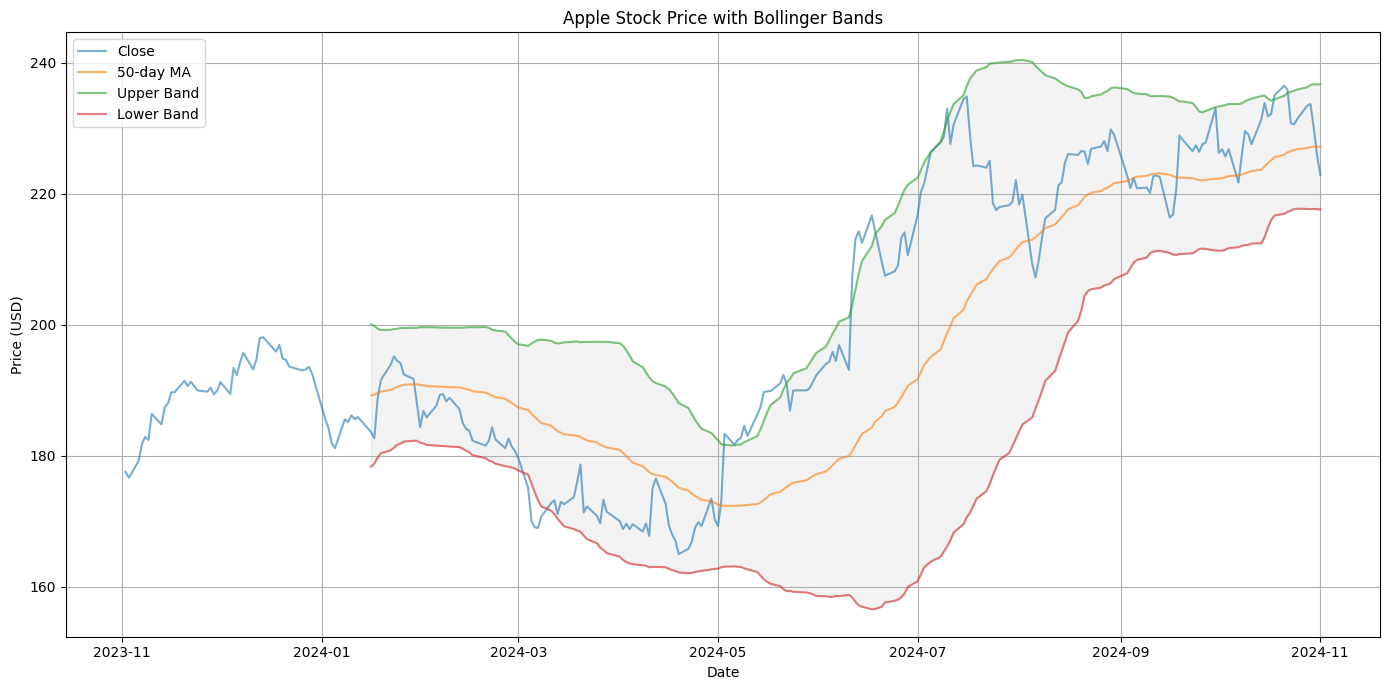

In [51]:
data['Upper_Band'] = data['MA50'] + (2 * data['Close'].rolling(window=50).std())
data['Lower_Band'] = data['MA50'] - (2 * data['Close'].rolling(window=50).std())

plt.figure(figsize=(15, 7))
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close', alpha=0.6)
plt.plot(data['MA50'], label='50-day MA', alpha=0.6)
plt.plot(data['Upper_Band'], label='Upper Band', alpha=0.6)
plt.plot(data['Lower_Band'], label='Lower Band', alpha=0.6)
plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], color='grey', alpha=0.1)
plt.title('Apple Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

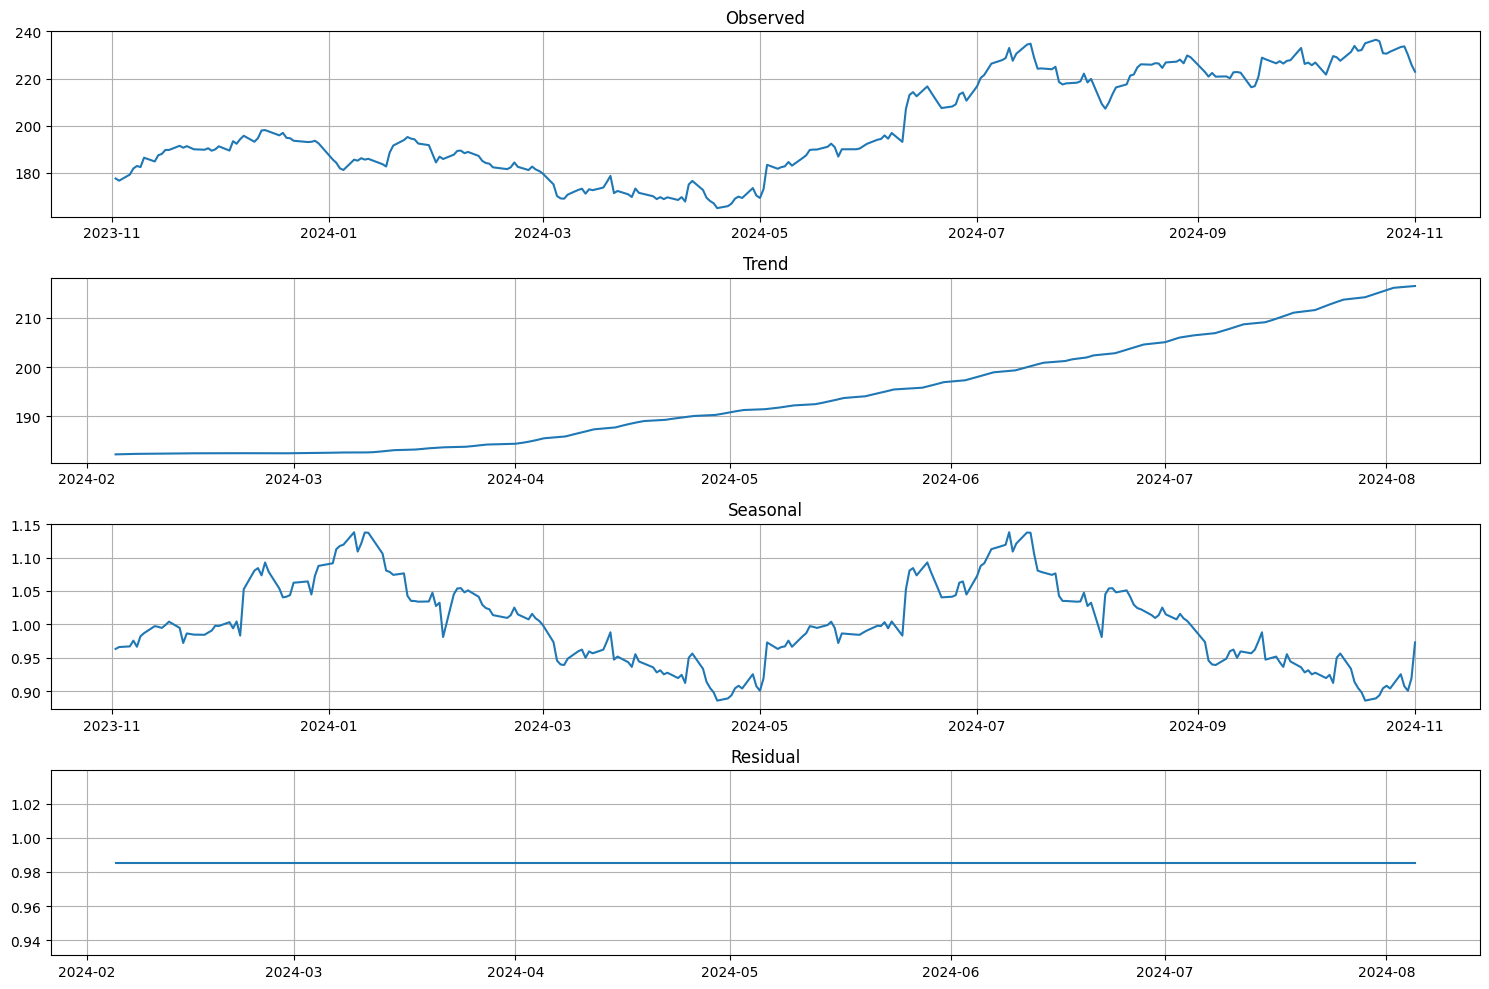

In [58]:
period = int(np.round(len(data) / (len(data.index.year.unique()))))
decomposition =  seasonal_decompose(data['Close'], model='multiplicative', period=period)

plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')
plt.grid(True)

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.grid(True)

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.grid(True)

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()